#### Clusterização dos Usuários

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

colors = ['darkorange', 'darkgreen', 'royalblue', 'salmon', 'firebrick', 'darkgray', 'teal',
         'sandybrown', 'dodgerblue', 'crimson', 'gold', 'darkolivegreen', 'skyblue', 'mediumpurple',
         'indianred', 'darkcyan', 'chocolate', 'cornflowerblue', 'tan', 'darkblue'];

In [2]:
dados_historicos = pd.read_excel('Dados_historicos.xlsx')
dados_historicos.set_index('User', inplace = True)
dados_historicos.head()

,Habilidade 1,Habilidade 2,Habilidade 3,Habilidade 4,Habilidade 5,Habilidade 6,Habilidade 7,Habilidade 8,Habilidade 9,Habilidade 10
User,,,,,,,,,,
User1,87,92,46,54,68,84,0,35,3,83
User2,100,59,22,1,83,30,36,75,2,10
User3,95,86,14,53,16,39,81,3,88,91
User4,79,41,52,27,82,30,42,65,15,37
User5,91,20,91,40,40,67,25,52,69,71


#### Escalonamento

In [3]:
scl = StandardScaler()
X = scl.fit_transform(dados_historicos)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


##### Agrupamento K-Means

In [4]:
def kmeans(numero_de_clusters, dados):
  modelo = KMeans(n_clusters = numero_de_clusters)
  modelo.fit(dados)
  return [numero_de_clusters, modelo.inertia_]

In [5]:
qtd_grupos = [kmeans(n_clusters, X) for n_clusters in range(1, 50)]
qtd_grupos = pd.DataFrame(qtd_grupos, columns = ['n_clusters', 'inercia'])

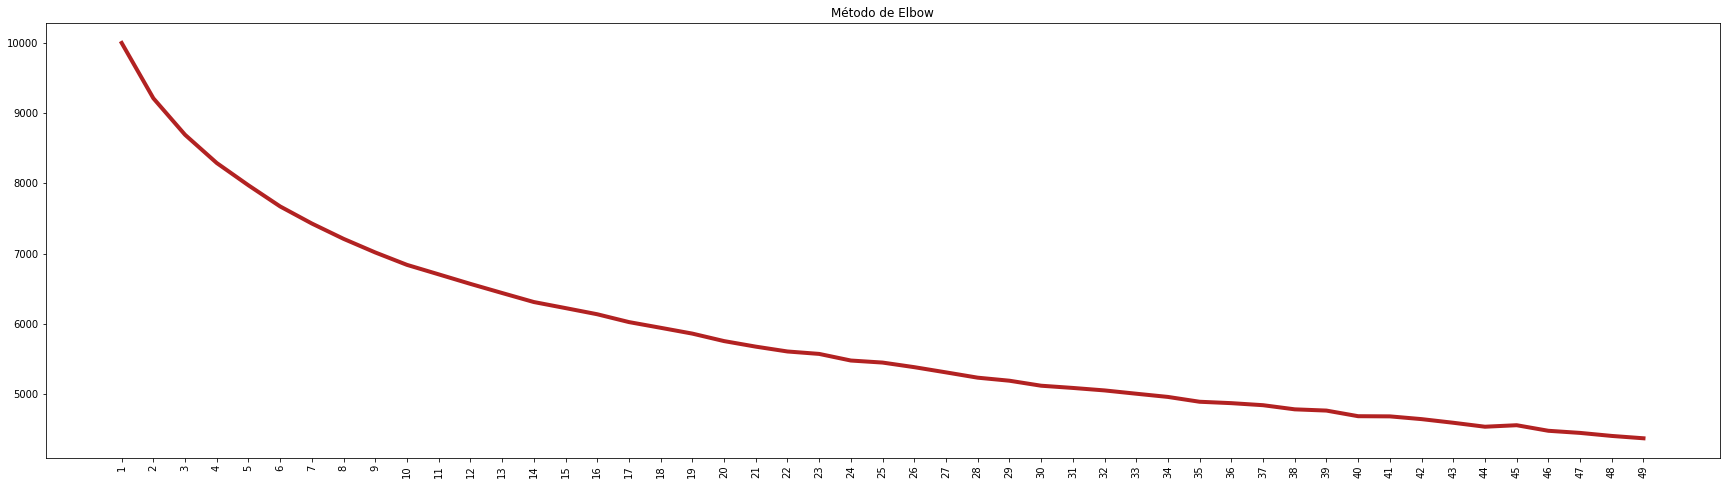

In [6]:
plt.figure(figsize = [30,8])
plt.plot(qtd_grupos['n_clusters'], qtd_grupos['inercia'], color = 'firebrick', lw = 4)
plt.xticks(qtd_grupos['n_clusters'], rotation = 'vertical')
name = 'Método de Elbow'
plt.title(name)
plt.savefig(name+'.png', dpi = 300)
plt.show()

In [7]:
agrup = KMeans(n_clusters = 10, random_state=42).fit(X)
dados_historicos['Grupo_Geral'] = agrup.labels_

In [8]:
grupo = pd.DataFrame(agrup.cluster_centers_)

In [9]:
grupo.columns = dados_historicos.columns[0:10]

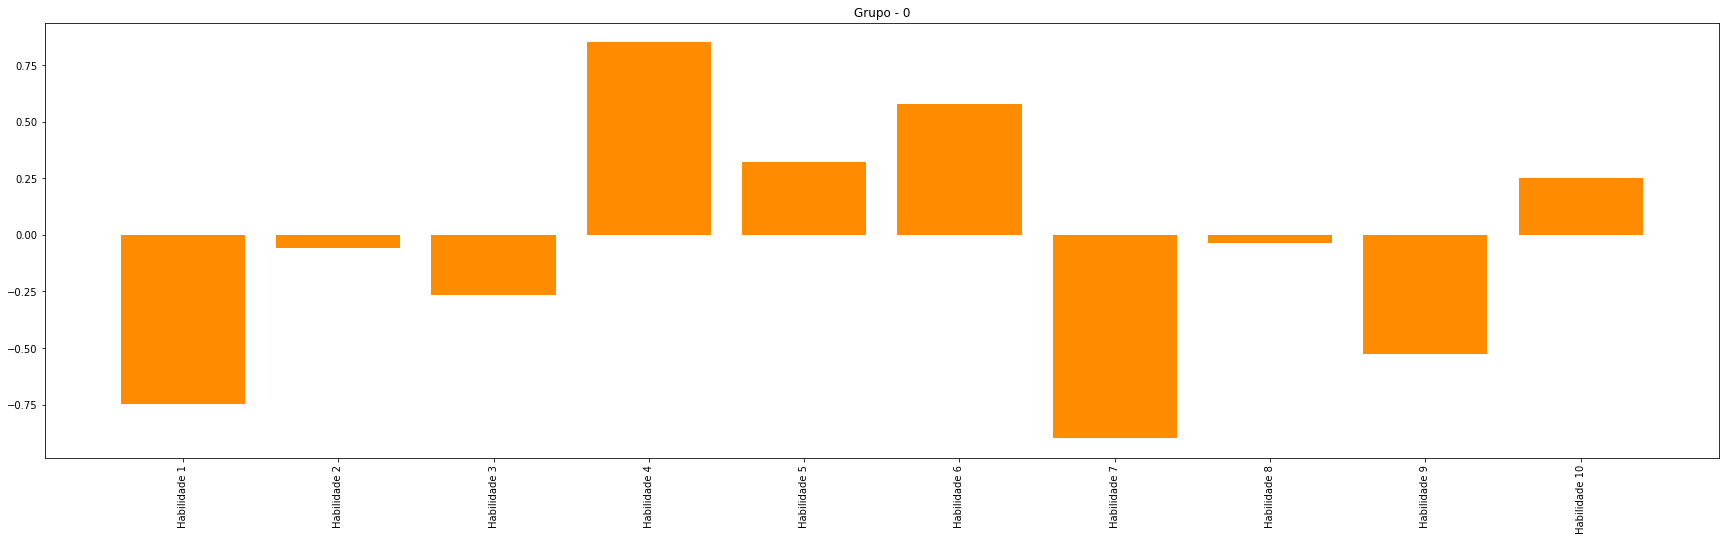

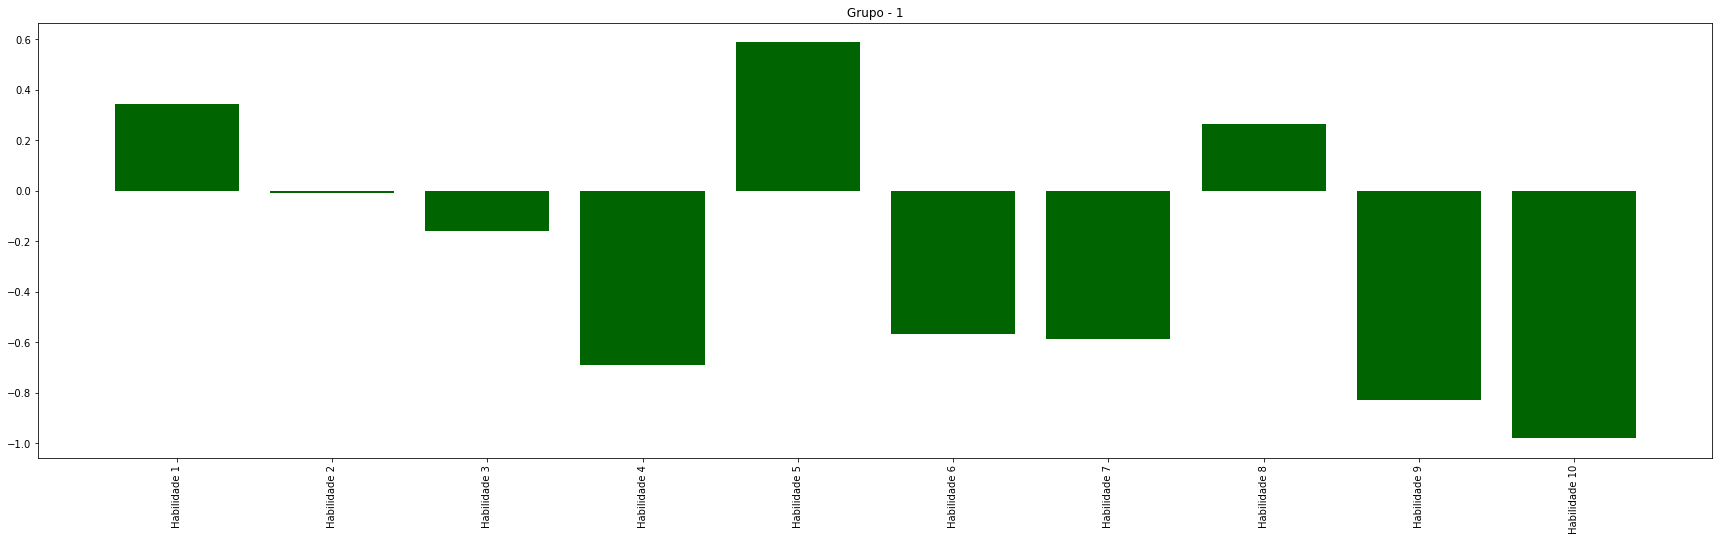

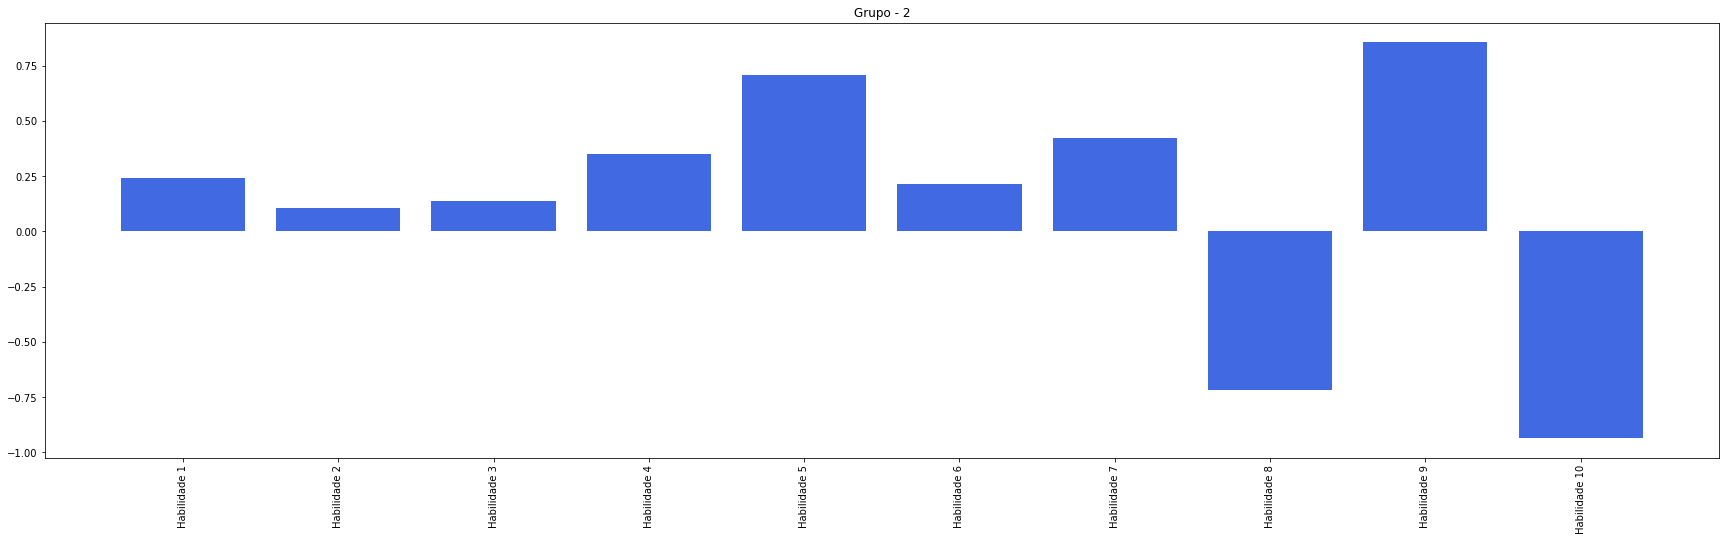

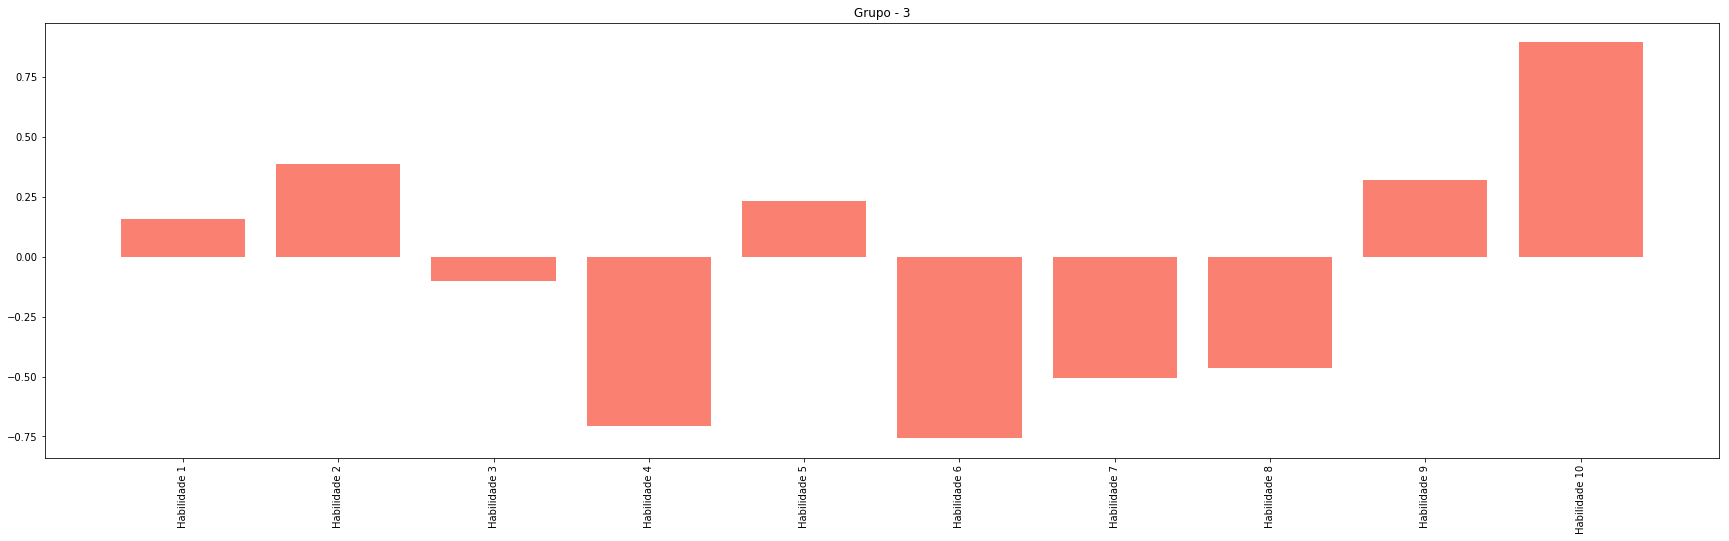

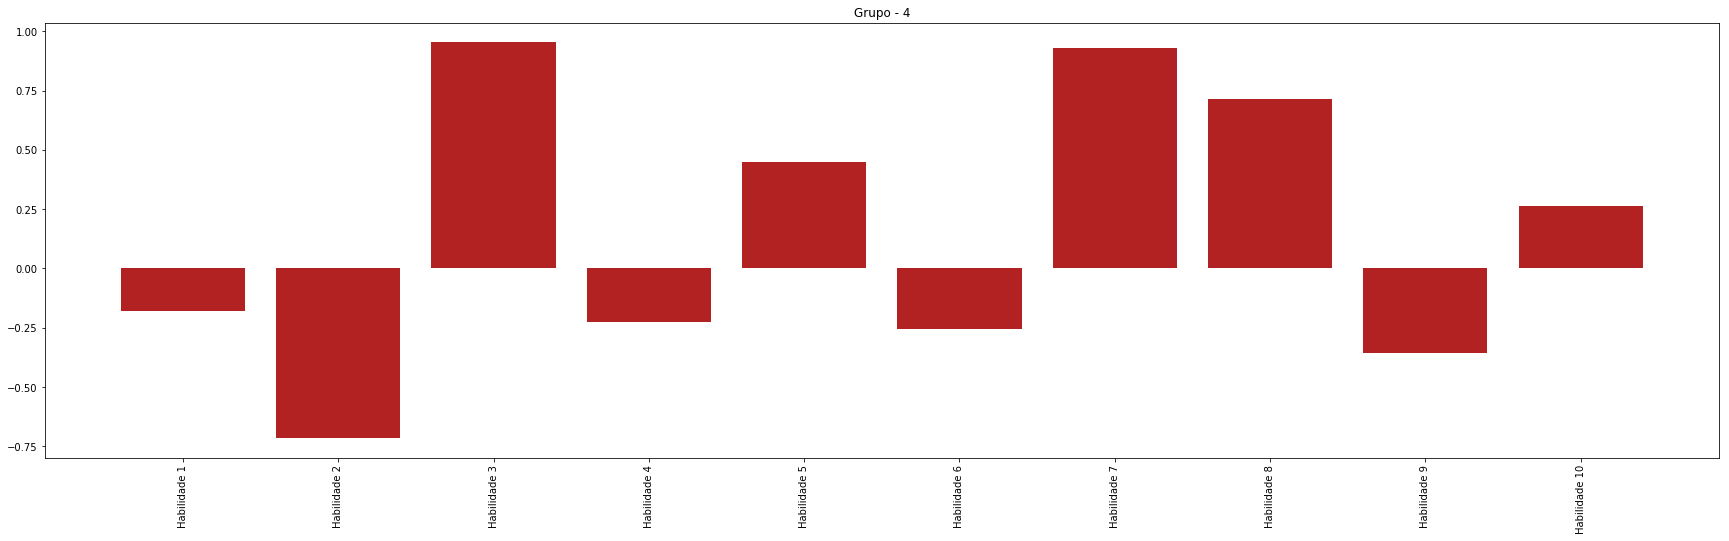

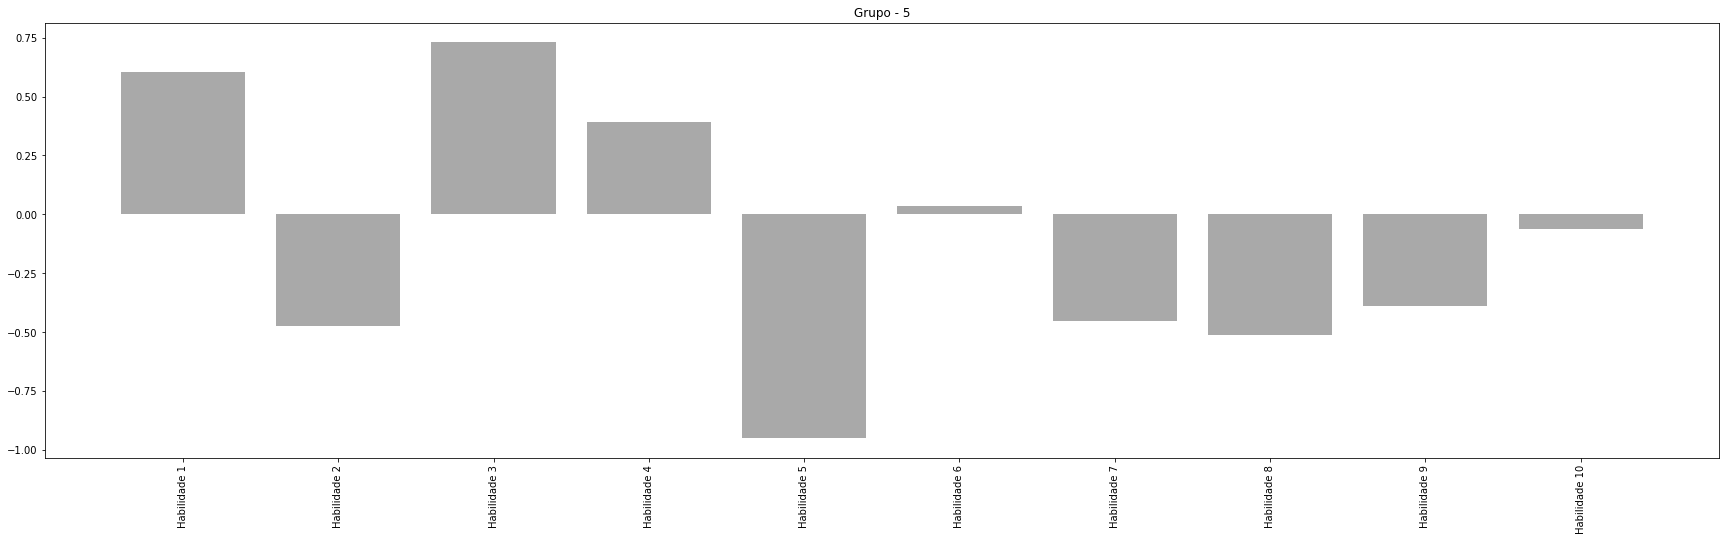

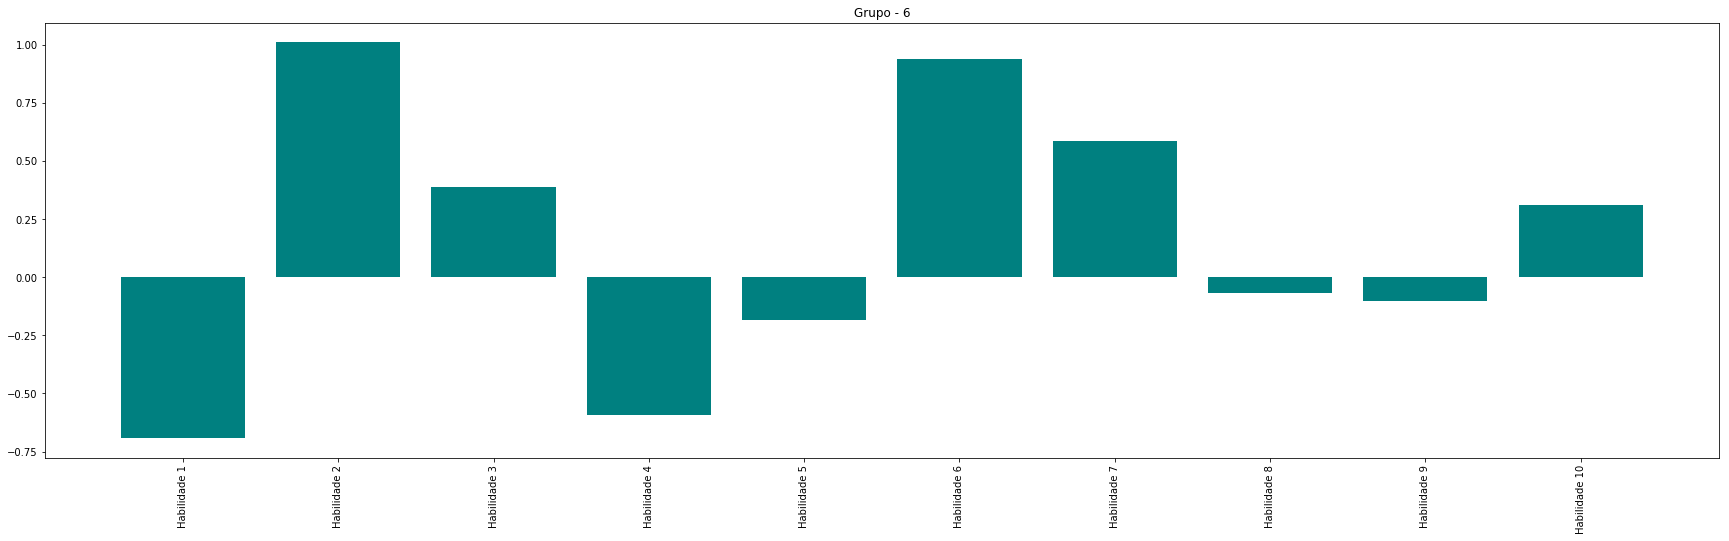

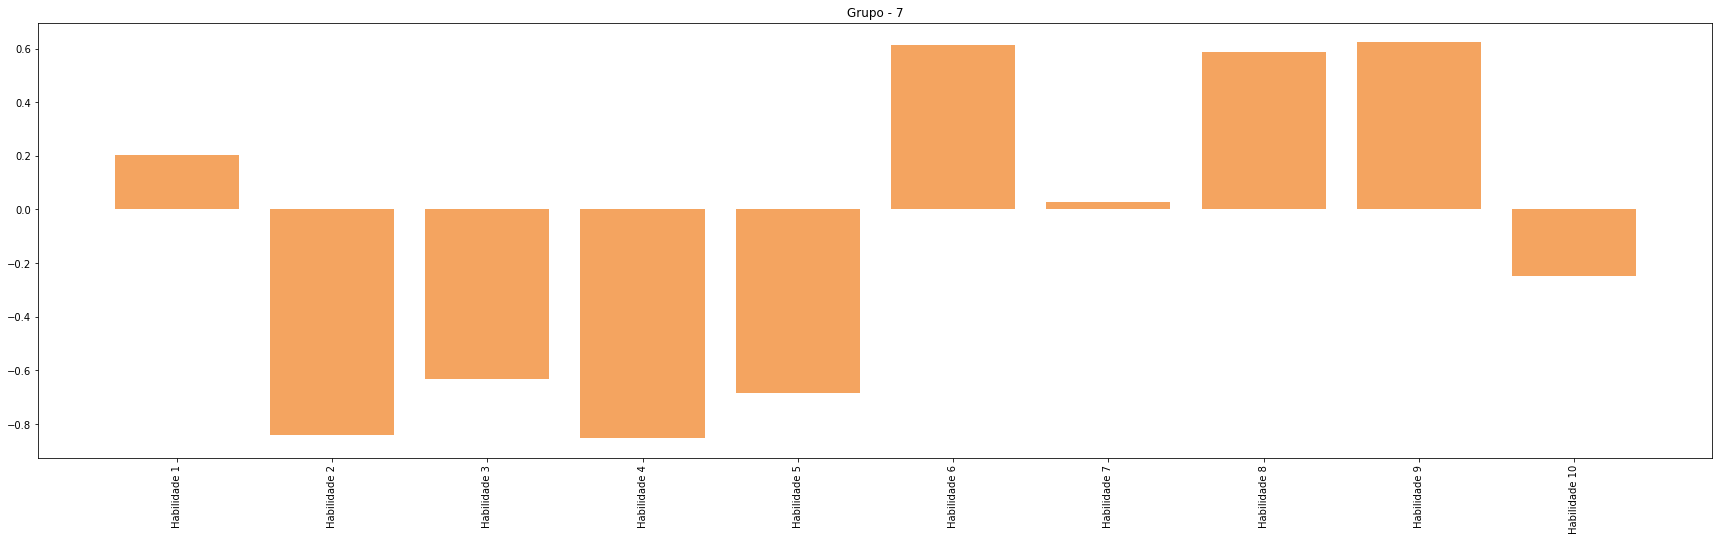

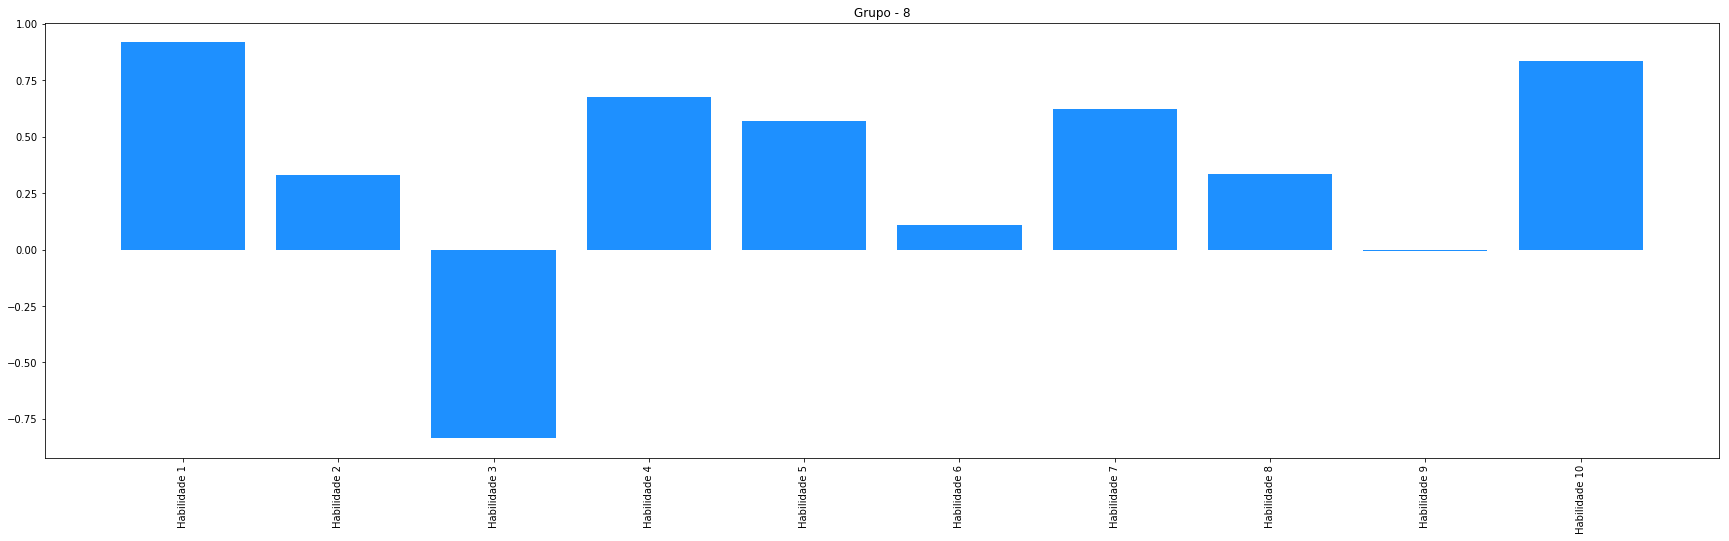

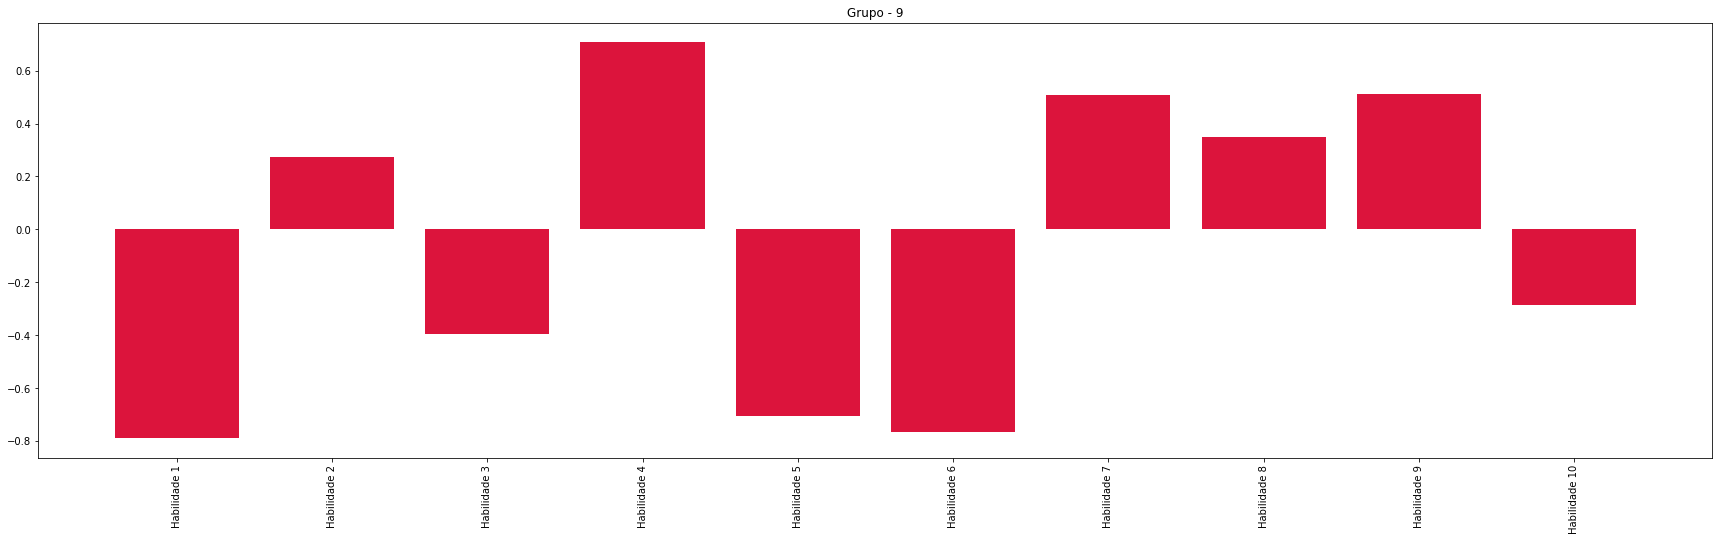

In [10]:
eixo = np.arange(10)

plt.rcParams['axes.prop_cycle']
colors = ['darkorange', 'darkgreen', 'royalblue', 'salmon', 'firebrick', 'darkgray', 'teal',
         'sandybrown', 'dodgerblue', 'crimson', 'gold', 'darkolivegreen', 'skyblue', 'mediumpurple',
         'indianred', 'darkcyan', 'chocolate', 'cornflowerblue', 'tan', 'darkblue']

for i in range(10):
    plt.figure(figsize = [30,8])
    plt.bar(eixo, grupo[grupo.index == i].values[0], color = colors[i])
    name = 'Grupo - '+str(i)
    plt.title(name)
    plt.xticks(eixo, grupo.columns, rotation = 'vertical')
    plt.savefig(name+'.png', dpi = 300)
    plt.show()

In [11]:
user = dados_historicos[dados_historicos.index == 'User42']

In [15]:
dados_historicos.to_json(orient = 'index')

'{"User1":{"Habilidade 1":87,"Habilidade 2":92,"Habilidade 3":46,"Habilidade 4":54,"Habilidade 5":68,"Habilidade 6":84,"Habilidade 7":0,"Habilidade 8":35,"Habilidade 9":3,"Habilidade 10":83,"Grupo_Geral":0},"User2":{"Habilidade 1":100,"Habilidade 2":59,"Habilidade 3":22,"Habilidade 4":1,"Habilidade 5":83,"Habilidade 6":30,"Habilidade 7":36,"Habilidade 8":75,"Habilidade 9":2,"Habilidade 10":10,"Grupo_Geral":1},"User3":{"Habilidade 1":95,"Habilidade 2":86,"Habilidade 3":14,"Habilidade 4":53,"Habilidade 5":16,"Habilidade 6":39,"Habilidade 7":81,"Habilidade 8":3,"Habilidade 9":88,"Habilidade 10":91,"Grupo_Geral":8},"User4":{"Habilidade 1":79,"Habilidade 2":41,"Habilidade 3":52,"Habilidade 4":27,"Habilidade 5":82,"Habilidade 6":30,"Habilidade 7":42,"Habilidade 8":65,"Habilidade 9":15,"Habilidade 10":37,"Grupo_Geral":1},"User5":{"Habilidade 1":91,"Habilidade 2":20,"Habilidade 3":91,"Habilidade 4":40,"Habilidade 5":40,"Habilidade 6":67,"Habilidade 7":25,"Habilidade 8":52,"Habilidade 9":69,"Ha

#### Exportação do Scaler

In [13]:
pickle.dump(scl, open('escala_agrup.m', 'wb'))

In [14]:
pickle.dump(agrup, open('agrupamento.m', 'wb'))